<a href="https://colab.research.google.com/github/saharCoder/DataAnalysis/blob/main/ANOVA_ANCOVA_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dataset from seaborn:
df=sns.load_dataset("diamonds")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Adding the logarithm of the price into a new column:
df['log_price']=np.log(df['price'])

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131


In [6]:
#subset the dataset into (color,price,log_price) columns only
data=df[['color','price','log_price']]
data.tail()

,color,price,log_price
53935,D,2757,7.921898
53936,D,2757,7.921898
53937,D,2757,7.921898
53938,H,2757,7.921898
53939,D,2757,7.921898


### Data Exploration

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   color      53940 non-null  category
 1   price      53940 non-null  int64   
 2   log_price  53940 non-null  float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 896.0 KB


In [8]:
print("Rows: ",data.shape[0],", Columns: ",data.shape[1])

Rows:  53940 , Columns:  3


In [9]:
data.columns

Index(['color', 'price', 'log_price'], dtype='object')

In [10]:
data.describe()

,price,log_price
count,53940.000000,53940.000000
mean,3932.799722,7.786768
std,3989.439738,1.014649
min,326.000000,5.786897
25%,950.000000,6.856462
50%,2401.000000,7.783641
75%,5324.250000,8.580027
max,18823.000000,9.842835


High standard deviation means that the data is more spread out

<Axes: >

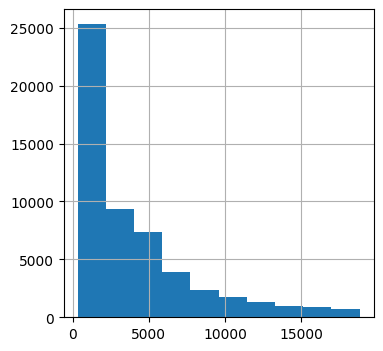

In [11]:
plt.figure(figsize=(4,4))
data['price'].hist()

      color  price  log_price
0         E    326   5.786897
1         E    326   5.786897
2         E    327   5.789960
3         I    334   5.811141
4         J    335   5.814131
...     ...    ...        ...
53935     D   2757   7.921898
53936     D   2757   7.921898
53937     D   2757   7.921898
53938     H   2757   7.921898
53939     D   2757   7.921898

[53940 rows x 3 columns]


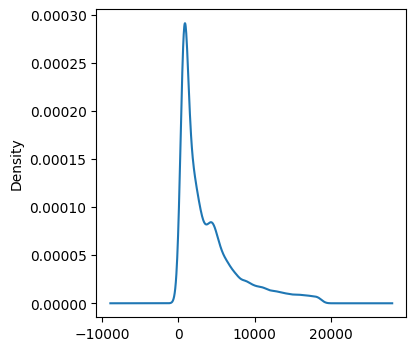

In [12]:
plt.figure(figsize=(4,4))
data['price'].plot(kind='kde')
print(data)

<ipython-input-13-74cdcdb4fa29>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


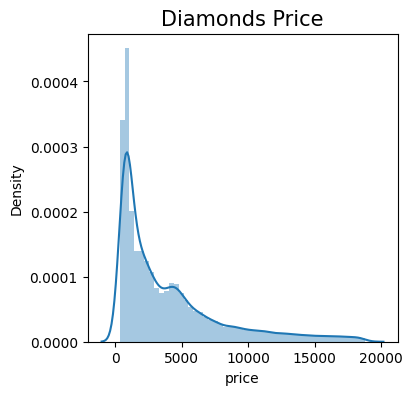

In [13]:
plt.figure(figsize=(4,4))
plt.title("Diamonds Price",fontsize=15)
sns.distplot(data['price'])
plt.show()

#### Missing values

In [14]:
data.isnull().sum()

color        0
price        0
log_price    0
dtype: int64

There are no missing valeues in the whole dataset

#### Exploring Catogrical data

In [15]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [16]:
print('There are', len(list(data['color'].value_counts().index)),'different colors for diamonds')

There are 7 different colors for diamonds


In [17]:
color=list(data['color'].value_counts().index)
amount=list(data['color'].value_counts().values)

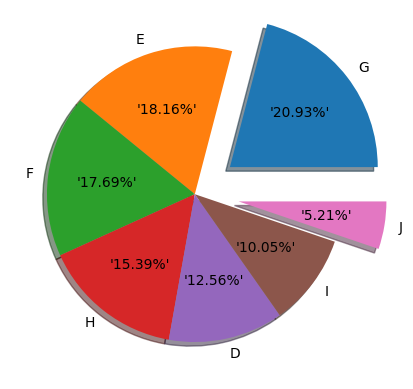

In [18]:
#we can display some percentage: showing the percentage of diamonds color in the dataset
minvalue=min(amount)
mind=amount.index(minvalue)
maxvalue=max(amount)
maxind=amount.index(maxvalue)
explode=[0,0,0,0,0,0,0]
for i in range(8):
  if i==mind or i==maxind:
    explode[i]=0.3
plt.pie(amount, labels=color,  shadow = True, autopct="'%1.2f%%'",explode=explode)
plt.show()

there are few diamonds with J color

<BarContainer object of 7 artists>

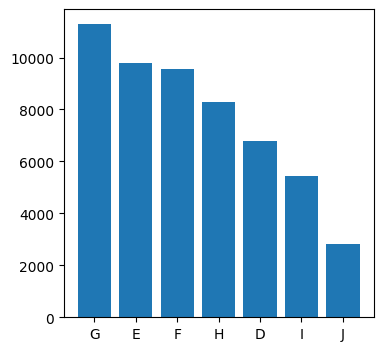

In [19]:
#bar plot
plt.figure(figsize=(4,4))
plt.bar(color,amount)

<Axes: xlabel='color'>

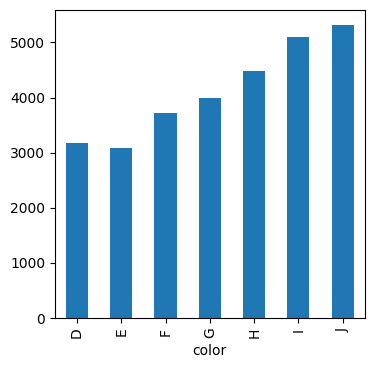

In [20]:
plt.figure(figsize=(4,4))
data.groupby('color')['price'].mean().plot.bar()

<Axes: ylabel='Frequency'>

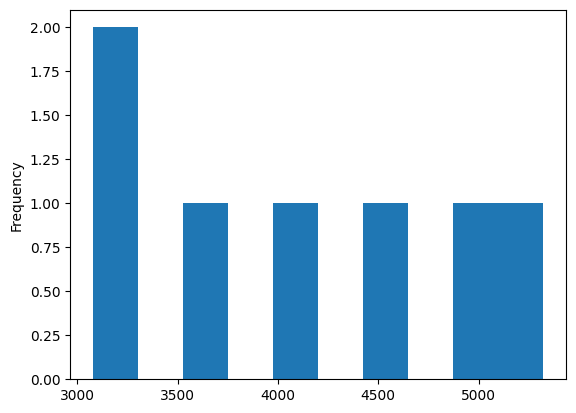

In [37]:
data.groupby('color')['price'].mean().plot.hist()

This is an important plot, in the pie chart the J color countered the least percentage, but the average price for the diamonds with J color is the highest

#### Outlier Detection

In [21]:
def boxplotter(column,xlabel,title): # Box plot
  fig, ax = plt.subplots(figsize=(5, 4))
  box = sns.boxplot(x=data[column])
  g = plt.gca()
  #box.set_xticklabels(np.array([readable_numbers(x) for x in g. 􏰀→get_xticks()]))
  plt.xlabel(xlabel)
  plt.title(title)
  plt.show()

In [22]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(data[column_str].median(), 1)
    fig, ax = plt.subplots(figsize=(5, 4))
    ax = sns.histplot(x=data[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

In [23]:
def skeweness(column):
   mean=np.mean(data[column])
   median=np.median(data[column])
   print("The mean: ",mean)
   #calculating the median
   print("The median: ",median)
   if mean>median:
     print('The data more likely to be skewed to the RIGHT!')
   else:
     print('The data more likely to be skewed to the LEFT!')

In [24]:
skeweness('price')

The mean:  3932.799721913237
The median:  2401.0
The data more likely to be skewed to the RIGHT!


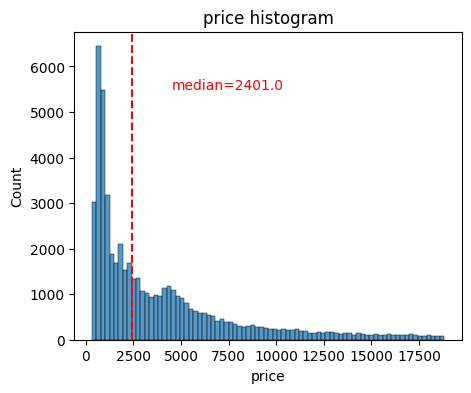

In [25]:
histogrammer('price',True)

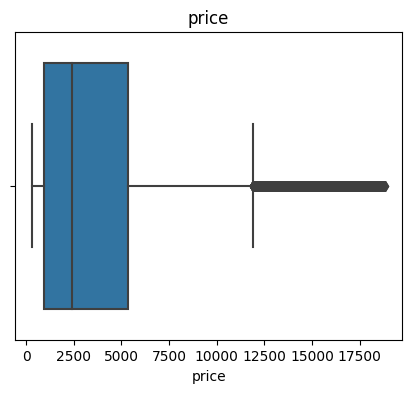

In [26]:
boxplotter('price','price','price')

<Axes: xlabel='color', ylabel='log_price'>

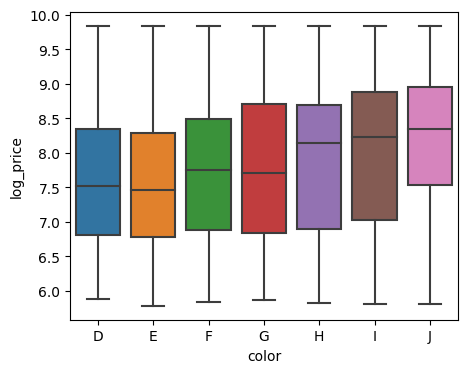

In [38]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='color',y='log_price',data=data)

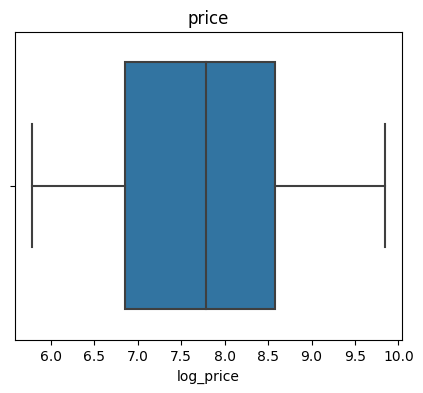

In [40]:
boxplotter('log_price','log_price','price')

In [29]:
skeweness('price')

The mean:  7.78676847907742
The median:  7.783640596221253
The data more likely to be skewed to the RIGHT!


<ipython-input-30-98c02183ab69>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['log_price'])


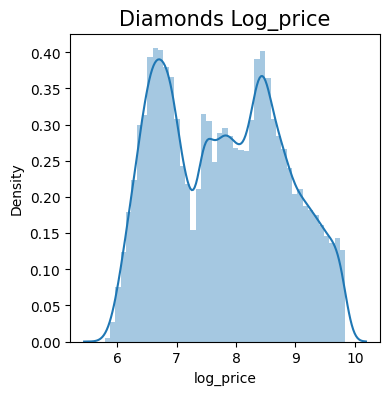

In [30]:
plt.figure(figsize=(4,4))
plt.title("Diamonds Log_price",fontsize=15)
sns.distplot(data['log_price'])
plt.show()

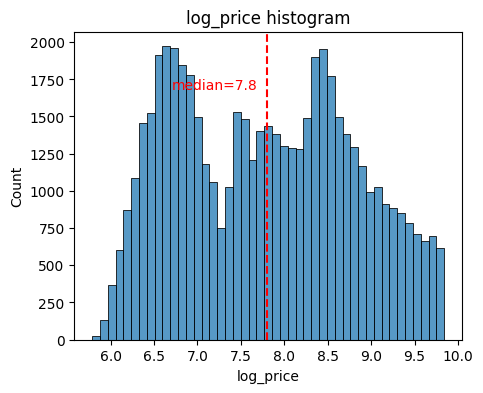

In [31]:
histogrammer('log_price',True)

### OLS Regression Model

In [32]:
import statsmodels.api as st
from statsmodels.formula.api import ols

In [33]:
#Building the regression model using the ols model
olsmodel=ols(formula='log_price ~ C(color)',data=data).fit()

In [35]:
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     237.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          3.77e-301
Time:                        09:36:36   Log-Likelihood:                -76617.
No. Observations:               53940   AIC:                         1.532e+05
Df Residuals:                   53933   BIC:                         1.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    625.984      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.370      0.018      -0.069      -0.006
C(color)[T.F]     0.1455      0.016      9.146      0.000       0.114       0.177
C(color)[T.G]     0.1727      0.015     11.219      0.000       0.143       0.203
C(color)[T.H]     0.3015      0.016     18.390      0.000       0.269       0.334
C(color)[T.I]     0.4061      0.018     22.250      0.000       0.370       0.442
C(color)[T.J]     0.5291      0.022     23.537      0.000       0.485       0.573
==============================================================================
Omnibus:                    11794.122   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.596
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Running ANOVA Test model

The t-test is used to state the hypothisis on equal means among 2 groups of data, but when we have 3 groups or more we use anova test to state whether the 3 groups have the same mean or not?

- This is only the one way anova, because we are examining if the color of the diamond do affect the price of the diamond or not, Thus we are dealing only with one variable which is the "COLOR"

In [36]:
st.stats.anova_lm(olsmodel,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),6.0,1431.255783,238.54263,237.807767,3.767555e-301
Residual,53933.0,54099.661516,1.00309,NaN,NaN


- The p value tells us if we can reject or accept the null hypothisis.
- F: tells us how much the variable is affecting the outcome variable


A one-factor analysis of variance has shown that there is a significant difference between the categorical variable Place and the variable Salary F = 237.81, p = 3.767555e-301 Thus, with the available data, the null hypothesis is rejected.

### Two-Way ANOVA

Two-Way ANOVA care about having two variables

In [41]:
#Add another catogrical data into the diamonds dataset
extracted_col = df["cut"]
data = data.join(extracted_col)

In [42]:
data.head()

,color,price,log_price,cut
0,E,326,5.786897,Ideal
1,E,326,5.786897,Premium
2,E,327,5.789960,Good
3,I,334,5.811141,Premium
4,J,335,5.814131,Good


#### New column explortion

<Axes: xlabel='cut', ylabel='log_price'>

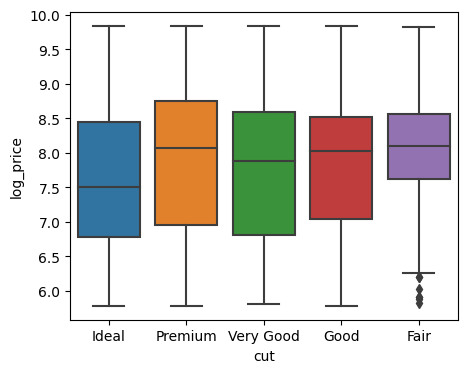

In [43]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='cut',y='log_price',data=data)

<BarContainer object of 5 artists>

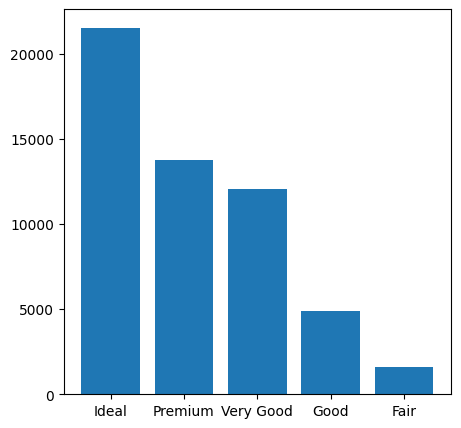

In [46]:
#bar plot
plt.figure(figsize=(5,5))
plt.bar(list(data['cut'].value_counts().index),list(data['cut'].value_counts().values))

<Axes: xlabel='cut'>

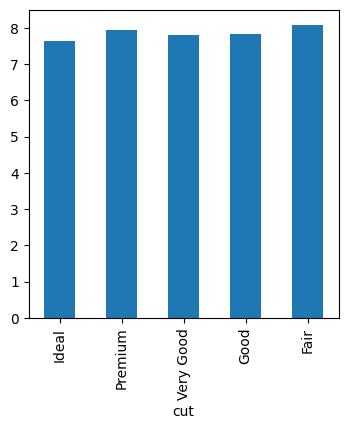

In [51]:
plt.figure(figsize=(4,4))
data.groupby('cut')['log_price'].mean().plot.bar()

- This indicate that the mean log price for the cut is almost the same!

In [52]:
#Building the regression model using the ols model
olsmodel2=ols(formula='log_price ~ C(color) + C(cut) + C(color):C(cut)',data=data).fit()

In [53]:
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     72.53
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:26:51   Log-Likelihood:                -76115.
No. Observations:               53940   AIC:                         1.523e+05
Df Residuals:                   53905   BIC:                         1.526e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    399.952      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.230      0.818      -0.054       0.042
C(color)[T.F]                         0.1755      0.025      7.136      0.000       0.127       0.224
C(color)[T.G]                         0.2352      0.023     10.035      0.000       0.189       0.281
C(color)[T.H]                         0.2756      0.026     10.695      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.029     13.240      0.000       0.323       0.435
C(color)[T.J]                         0.5457      0.038     14.345      0.000       0.471       0.620
C(cut)[T.Premium]                     0.2828      0.031      9.116      0.000       0.222       0.344
C(cut)[T.Very Good]                   0.2295      0.032      7.261      0.000       0.168       0.291
C(cut)[T.Good]                        0.2675      0.043      6.243      0.000       0.184       0.351
C(cut)[T.Fair]                        0.6610      0.080      8.268      0.000       0.504       0.818
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.797      0.426      -0.112       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.041      0.772      0.440      -0.048       0.111
C(color)[T.G]:C(cut)[T.Premium]      -0.0656      0.039     -1.695      0.090      -0.142       0.010
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.299      0.022       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.824      0.068      -0.006       0.174
C(color)[T.J]:C(cut)[T.Premium]       0.0610      0.057      1.065      0.287      -0.051       0.173
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.284      0.022      -0.173      -0.013
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.449      0.014      -0.182      -0.020
C(color)[T.G]:C(cut)[T.Very Good]    -0.1590      0.040     -3.941      0.000      -0.238      -0.080
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.574      0.566      -0.109       0.060
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.750      0.453      -0.058       0.130
C(color)[T.J]:C(cut)[T.Very Good]    -0.0979      0.060     -1.644      0.100      -0.215       0.019
C(color)[T.E]:C(cut)[T.Good]         -0.0112      0.056     -0.201      0.841      -0.121       0.099
C(color)[T.F]:C(cut)[T.Good]         -0.1196      0.056     -2.122      0.034      -0.230      -0.009
C(color)[T.G]:C(cut)[T.Good]         -0.0453      0.056     -0.805      0.421      -0.156       0.065
C(color)[T.H]:C(cut)[T.Good]         -0.1066      0.060     -1.788      0.074      -0.223       0.010
C(color)[T.I]:C(cut)[T.

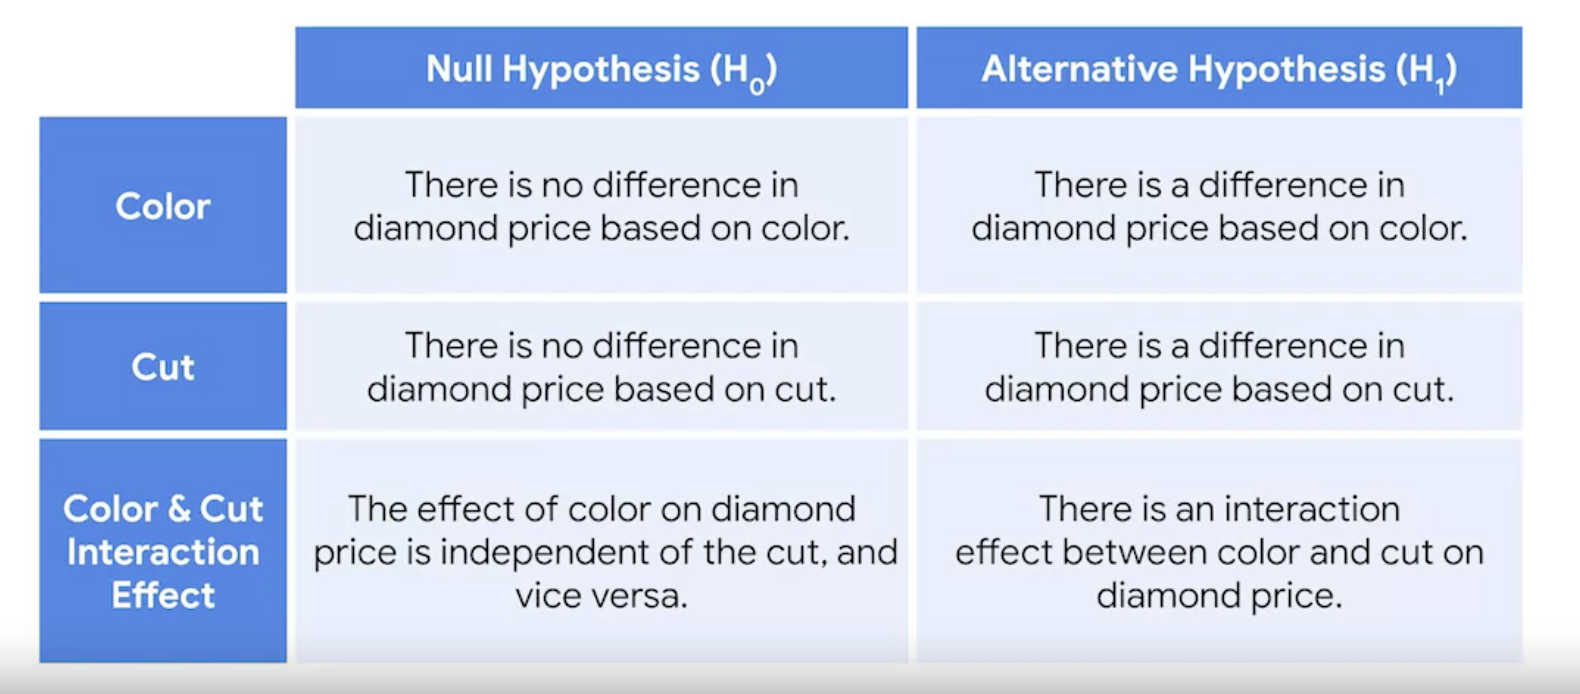

In [54]:
st.stats.anova_lm(olsmodel2,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),6.0,1431.255783,238.542630,242.151273,1.206538e-306
C(cut),4.0,901.918331,225.479583,228.890609,3.250547e-195
C(color):C(cut),24.0,96.058742,4.002448,4.062996,8.168980e-11
Residual,53905.0,53101.684443,0.985098,NaN,NaN


### Post hoc Test

In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [56]:
tukeyhsd=pairwise_tukeyhsd(endog=data['log_price'], groups=data['color'],alpha=0.05)

In [57]:
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.2115,-0.0842,0.0092,False
D,F,0.1455,0.0,0.0986,0.1924,True
D,G,0.1727,0.0,0.1273,0.2181,True
D,H,0.3015,0.0,0.2532,0.3499,True
D,I,0.4061,0.0,0.3522,0.4599,True
D,J,0.5291,0.0,0.4628,0.5953,True
E,F,0.183,0.0,0.1406,0.2255,True
E,G,0.2102,0.0,0.1694,0.251,True
E,H,0.339,0.0,0.295,0.3831,True
E,I,0.4436,0.0,0.3936,0.4935,True


The Reject column tells us if we can reject the null hypothisis or not:
- The null hypothisis: There are no difference in the mean of log price in different group of color
- Alternative hypothisis: There are IS difference in the mean of log price in different group of color

- True in the reject column tells us that we reject the null hypothisis and there is different mean log price between the 2 given color
- False in the reject column tells us that the null hypothisis is true and there is NO different in the mean log price between the 2 given color

## Results:
1. Different color have different mean log price
2. Different cut have different mean log price
3. There is an interaction and dependability between the cut and color on the price of the diamonds

Similar log price mean in colors, Accepted null hypothisis "using Post hoc Test":
*   D and E colors
*  F and G colors


### Running ANCOVA:


In [59]:
diamond=data
diamond=diamond.join(df['carat'])

In [60]:
diamond.head()

,color,price,log_price,cut,carat
0,E,326,5.786897,Ideal,0.23
1,E,326,5.786897,Premium,0.21
2,E,327,5.789960,Good,0.23
3,I,334,5.811141,Premium,0.29
4,J,335,5.814131,Good,0.31


In [61]:
#formula = 'log_price ~ C(color) + carat'
model = ols('log_price ~ C(color) + carat', diamond).fit()

# Perform the ANCOVA
ancova_table = st.stats.anova_lm(model, typ=2)

print(ancova_table)

                sum_sq       df              F  PR(>F)
C(color)   1017.040373      6.0    1220.311429     0.0
carat     46608.264906      1.0  335541.832021     0.0
Residual   7491.396610  53932.0            NaN     NaN


In [62]:
diamond['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

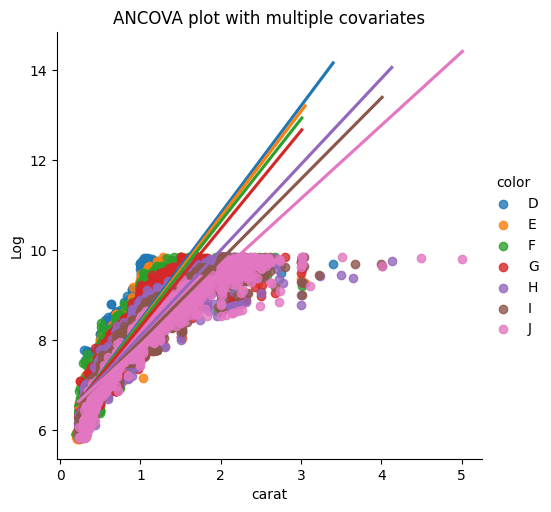

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='carat', y='log_price', hue='color', data=diamond, ci=None)

plt.xlabel('carat')
plt.ylabel('Log')
plt.title('ANCOVA plot with multiple covariates')
plt.show()

Another way to perform ANCOVA Test

In [ ]:
!pip3 install pingouin

In [70]:
from pingouin import ancova
ancova(data=diamond, dv='log_price', covar='carat', between='color')

,Source,SS,DF,F,p-unc,np2
0,color,1017.040373,6,1220.311429,0.0,0.119533
1,carat,46608.264906,1,335541.832021,0.0,0.861526
2,Residual,7491.396610,53932,NaN,NaN,NaN


Analyze the results obtained after performing ANCOVA.

ANCOVA() function after executing successfully it returns the following values.

ANCOVA summary:
- ‘Source’: Names of the factor considered
- ‘SS’: Sums of squares
- ‘DF’: Degrees of freedom
- ‘F’: F-values
- ‘p-unc’: Uncorrected p-values
- ‘np2’: Partial eta-squared

### RESULT FROM ANCOVA TEST:
- According to the ANCOVA table, the p-value (p-unc = “uncorrected p-value”) for study methodology is 0.025542. Because this value is less than 0.05, we can reject the null hypothesis that each of the colors results in the same average log price, even after controlling for the carat variable.

## MANOVA
We want to see if diamond log price and carat are associated with different diamond color using MANOVA.

In [80]:
diamond.groupby('color')['log_price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6775.0,7.616905,0.926359,5.877736,6.814543,7.516433,8.346049,9.835904
E,9797.0,7.579405,0.925420,5.786897,6.782192,7.461066,8.294799,9.837935
F,9542.0,7.762440,0.967514,5.834811,6.889591,7.759401,8.490490,9.841133
G,11292.0,7.789583,1.027715,5.869297,6.836259,7.715124,8.707483,9.842569
H,8304.0,7.918446,1.063218,5.820083,6.891626,8.149023,8.696218,9.841772
I,5422.0,8.022962,1.105842,5.811141,7.021530,8.224164,8.882079,9.842835
J,2808.0,8.145970,1.038166,5.814131,7.528600,8.350902,8.948326,9.836813


import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6015440679349829667, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6015440679349829667, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6015440679349829667, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6015440679349829667, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6015440679349829667, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6015440679349829667, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6015440679349829667, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6015440679349829667, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6015440679349829667 = autoviz.get_df('df_6015440679349829667')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6015440679349829667, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

In [79]:
diamond.groupby('color')['carat'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6775.0,0.657795,0.359573,0.20,0.36,0.53,0.905,3.40
E,9797.0,0.657867,0.368566,0.20,0.36,0.53,0.900,3.05
F,9542.0,0.736538,0.397588,0.20,0.40,0.70,1.010,3.01
G,11292.0,0.771190,0.441436,0.23,0.39,0.70,1.040,3.01
H,8304.0,0.911799,0.521236,0.23,0.41,0.90,1.200,4.13
I,5422.0,1.026927,0.579173,0.23,0.52,1.00,1.500,4.01
J,2808.0,1.162137,0.595801,0.23,0.71,1.11,1.520,5.01


import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4344528819593775197, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4344528819593775197, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4344528819593775197, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4344528819593775197, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4344528819593775197, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4344528819593775197, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4344528819593775197, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4344528819593775197, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4344528819593775197, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4344528819593775197, *['mean', 'count', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4344528819593775197, *['mean', '25%', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4344528819593775197, *['mean', '75%', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4344528819593775197 = autoviz.get_df('df_4344528819593775197')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4344528819593775197, *['mean', 'max', None], **{})
chart

<Axes: xlabel='color', ylabel='carat'>

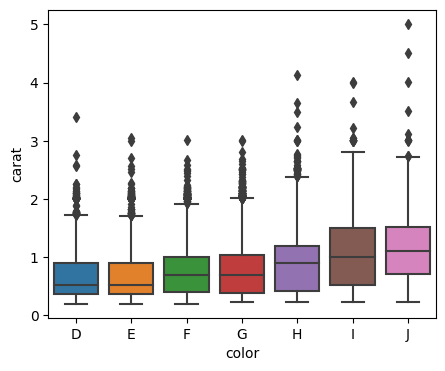

In [88]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='color',y='carat',data=diamond)

There alot of outliers in the carat variable

<Axes: >

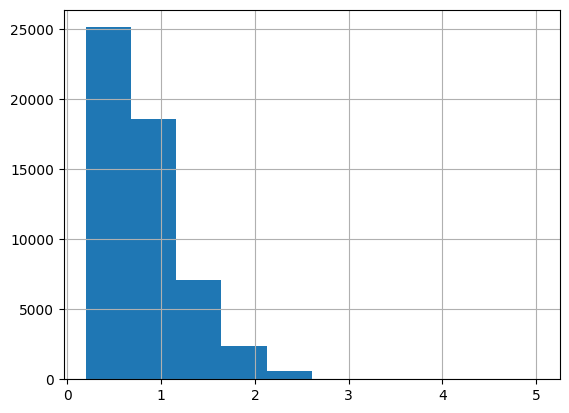

In [89]:
diamond['carat'].hist()

In [90]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('log_price + carat ~ color', data=diamond)
print(fit.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF     F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda  0.0272 2.0000 53932.0000 963484.1583 0.0000
         Pillai's trace  0.9728 2.0000 53932.0000 963484.1583 0.0000
 Hotelling-Lawley trace 35.7296 2.0000 53932.0000 963484.1583 0.0000
    Roy's greatest root 35.7296 2.0000 53932.0000 963484.1583 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
          color          Value   Num DF    Den DF    F Value  Pr > F
--------------------------------------------------------------------
           Wilks' lambda 0.7981 12.0000 107864.0000 1072

The Pillai’s Trace test statistics is statistically significant [Pillai’s Trace = 0.2026, p < 0.001] and indicates that plant color has a statistically significant association with both combined diamond carat and log price.

In [99]:
sample_data=diamond.sample(n=100,replace=True,random_state=32190)

In [100]:
sample_data[sample_data.index.duplicated()]

,color,price,log_price,cut,carat


In [101]:
sample_data = sample_data.reset_index()

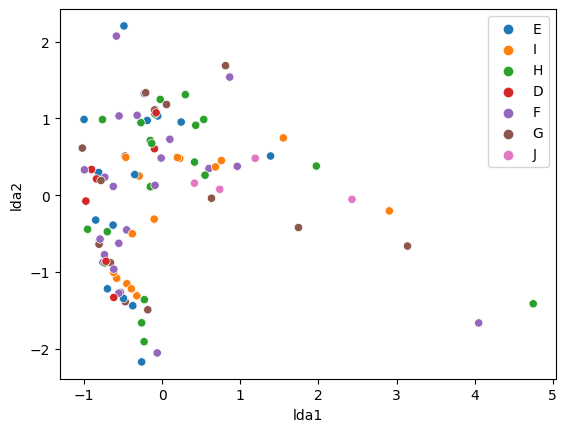

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

X = sample_data[["log_price", "carat"]]
y = sample_data["color"]
# plot
X_ne = pd.DataFrame(lda().fit(X=X, y=y).transform(X), columns=["lda1", "lda2"])
X_ne["color"] = sample_data["color"]
sns.scatterplot(data=X_ne, x="lda1", y="lda2", hue=sample_data.color.tolist())
plt.show()